In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
os.getcwd()

'C:\\Users\\dziubins\\Home\\Research\\Energy Loss Optical Scintillation System\\Scripts'

In [3]:
colnames=['X (mm)','ToF (ns)','dE (MeV)','TKE (MeV)','Brho (T*m)','A/Q','A']
stripper_ray_data = pd.read_table('..\\Data\\LISE++\\'+'MC_LISE4.ray', skiprows=6, delimiter=' ',
                                  names=colnames, usecols=list(range(1,8)))
CRDC1_ray_data = pd.read_table('..\\Data\\LISE++\\'+'MC_LISE4.ray', skiprows=6, delimiter=' ',
                                  names=colnames, usecols=list(range(8,15)))
IC_ray_data = pd.read_table('..\\Data\\LISE++\\'+'MC_LISE4.ray', skiprows=6, delimiter=' ',
                                  names=colnames, usecols=list(range(15,22)))
Scint1_ray_data = pd.read_table('..\\Data\\LISE++\\'+'MC_LISE4.ray', skiprows=6, delimiter=' ',
                                  names=colnames, usecols=list(range(22,29)))

In [7]:
x = CRDC1_ray_data['X (mm)']
ToF = Scint1_ray_data['ToF (ns)']
dE = IC_ray_data['dE (MeV)']
TKE = IC_ray_data['TKE (MeV)']
Brho = CRDC1_ray_data['Brho (T*m)']

In [21]:
L = 14 # m
c = 3e8 # m/s
beta = L/(c*ToF*1e-9)
gamma = 1/np.sqrt(1-beta**2)
#print(beta)

Z = np.sqrt(dE*beta**2)
Z += 48 - np.mean(Z)

AoQ = Brho/(3.1071*beta*gamma)
#print(AoQ)

A = TKE/(931.494*(gamma-1))
#print(A)

Q = A/AoQ
print(Q)

0       43.391419
1       46.684635
2       45.724846
3       45.043041
4       42.042754
          ...    
9995    43.876059
9996    40.423542
9997    43.039245
9998    45.029443
9999    45.640421
Length: 10000, dtype: float64


In [61]:
#print([int(aoq) for aoq in AoQ*10000])
AoQ_ = [int(aoq) for aoq in AoQ*100]

Z_ = [int(z) for z in Z*100]
#AoQ*10000
# Determine image size based on coordinate ranges
max_x = max(AoQ_)
max_y = max(Z_)
min_x = min(AoQ_)
min_y = min(Z_)
image_width = max_x + 1 - min_x
image_height = max_y + 1 - min_y
#print(image_height,image_width)
# Create a black image
image_array = np.zeros((image_width, image_height), dtype=np.uint8)

# Mark coordinates with white pixels
#for x in range(image_width):
#    for y in range(image_height):
#        if AoQ_
#        image_array[y,x] = 230
    #image_array[y, x] = 255
for i in range(len(Z_)):
    image_array[AoQ_[i]-min_x,Z_[i]-min_y] += 10
# Convert NumPy array to PIL Image
image = Image.fromarray(image_array)
image = image.convert('RGB')
image.show() # Display the image
# image.save("coordinates_image.png") # Save the image

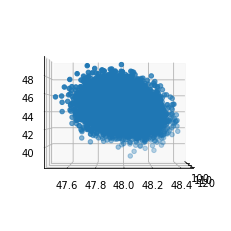

In [28]:
#plt.scatter(Q,Z,s=3)
#plt.colorbar()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(A, Z, Q, marker='o')
#angle_norm = (angle + 180) % 360 - 180
elev=0
azim=0
ax.view_init(elev, azim)